In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme()

In [ ]:
zipcode = '97035'
filename = 'data/' + zipcode + '_homes_data_cleaned.csv'
df = pd.read_csv(filename)

In [134]:
df.describe(include='all')

,Address,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,senior_community_yn,style,county,new_construction_yn,has_hoa
count,161,1.610000e+02,161.000000,161.000000,161.000000,161,161.000000,161,161,161,161,161,161
unique,161,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2
top,16900 Gassner Ln,NaN,NaN,NaN,NaN,Yes,NaN,Yes,No,Single Family Residential,Clackamas County,No,Yes
freq,1,NaN,NaN,NaN,NaN,88,NaN,105,159,105,123,157,95
mean,NaN,8.952504e+05,3.043478,2.366460,2069.118012,NaN,1980.726708,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.154414e+06,1.080207,0.913027,1251.263848,NaN,18.238348,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.500000e+05,1.000000,1.000000,600.000000,NaN,1920.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.400000e+05,2.000000,2.000000,1182.000000,NaN,1970.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,6.250000e+05,3.000000,2.500000,1784.000000,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.400000e+05,4.000000,2.500000,2637.000000,NaN,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
df['log_price'] = np.log(df['price'])

In [136]:
df.isnull().sum()

Address                0
price                  0
beds                   0
baths                  0
sqft                   0
view_yn                0
yr_built               0
cooling_yn             0
senior_community_yn    0
style                  0
county                 0
new_construction_yn    0
has_hoa                0
log_price              0
dtype: int64

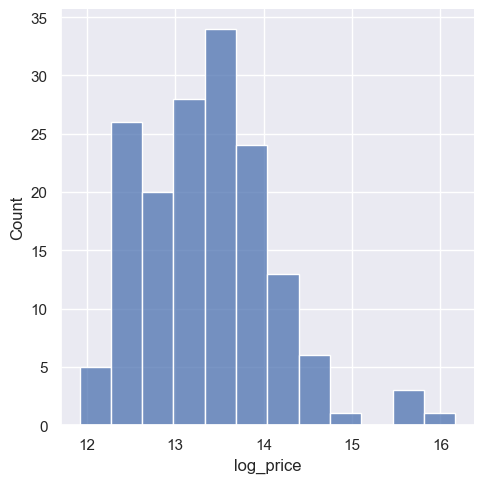

In [137]:
ax=sns.displot(df['log_price'])

In [138]:
q = df['log_price'].quantile(0.95)
df = df[df['log_price']<q]

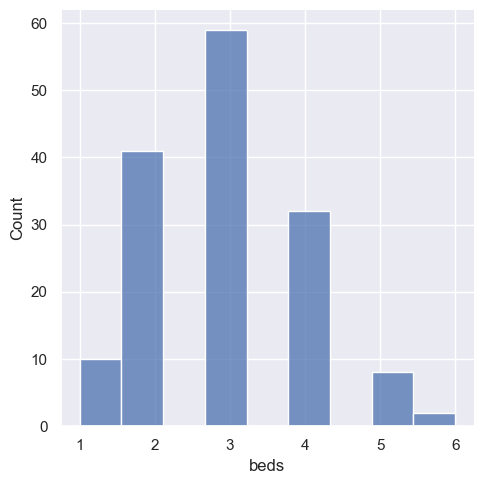

In [139]:
ax=sns.displot(df['beds'])

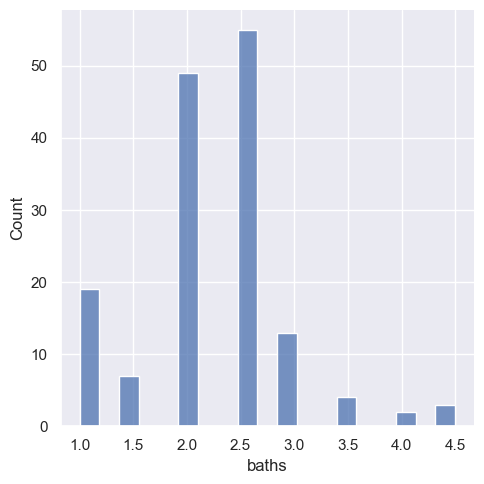

In [140]:
ax=sns.displot(df['baths'])

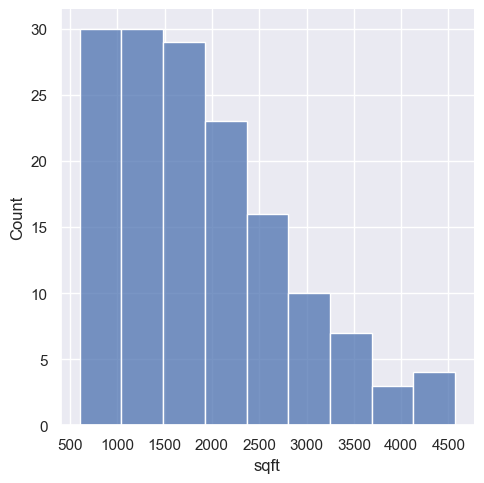

In [141]:
ax=sns.displot(df['sqft'])

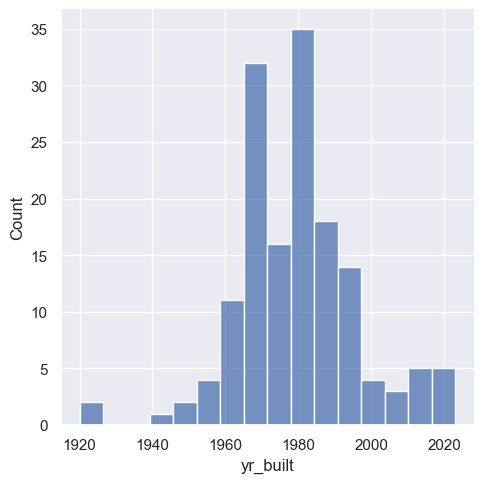

In [142]:
ax=sns.displot(df['yr_built'])

In [143]:
q = df['yr_built'].quantile(0.01)
df = df[df['yr_built']>q]

In [144]:
df = df.reset_index(drop=True)
df.describe(include='all')

,Address,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,senior_community_yn,style,county,new_construction_yn,has_hoa,log_price
count,150,1.500000e+02,150.000000,150.000000,150.000000,150,150.000000,150,150,150,150,150,150,150.000000
unique,150,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2,NaN
top,16900 Gassner Ln,NaN,NaN,NaN,NaN,Yes,NaN,Yes,No,Single Family Residential,Clackamas County,No,Yes,NaN
freq,1,NaN,NaN,NaN,NaN,81,NaN,94,148,94,112,149,92,NaN
mean,NaN,6.845034e+05,2.953333,2.226667,1876.860000,NaN,1980.060000,NaN,NaN,NaN,NaN,NaN,NaN,13.260422
std,NaN,4.064483e+05,1.044877,0.706125,922.747226,NaN,15.136617,NaN,NaN,NaN,NaN,NaN,NaN,0.608045
min,NaN,1.500000e+05,1.000000,1.000000,600.000000,NaN,1941.000000,NaN,NaN,NaN,NaN,NaN,NaN,11.918391
25%,NaN,3.275000e+05,2.000000,2.000000,1170.000000,NaN,1970.000000,NaN,NaN,NaN,NaN,NaN,NaN,12.699240
50%,NaN,6.100000e+05,3.000000,2.250000,1619.500000,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.321214
75%,NaN,8.962500e+05,4.000000,2.500000,2425.500000,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.705948


## Checking OLS Assumptions

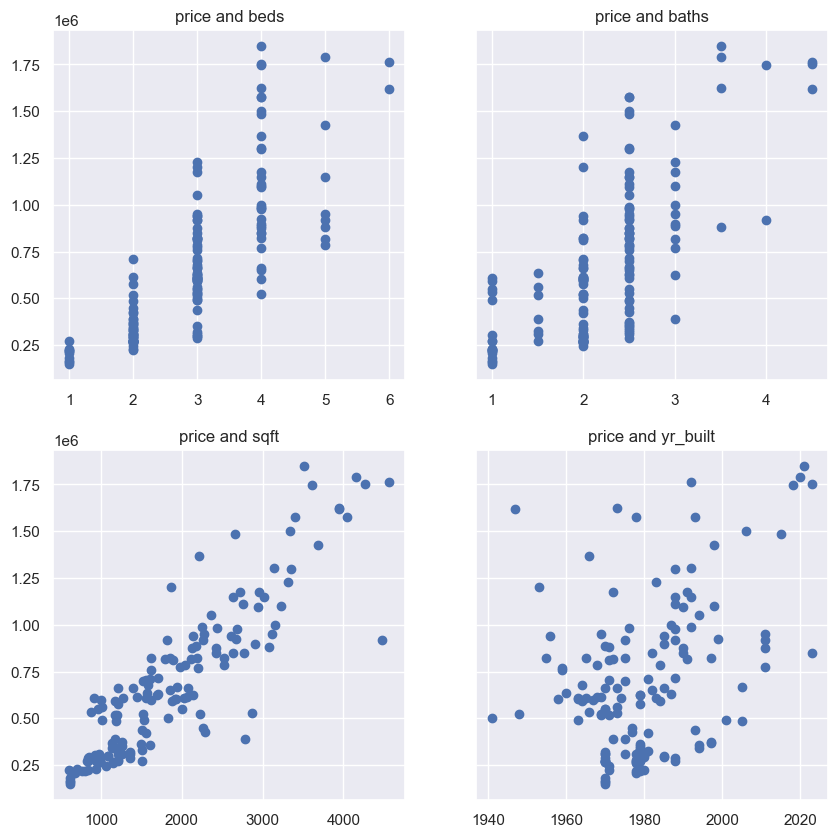

In [145]:
f, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, sharey=True, figsize=(10, 10))
ax1.scatter(df['beds'], df['price'])
ax1.set_title('price and beds')
ax2.scatter(df['baths'], df['price'])
ax2.set_title('price and baths')
ax3.scatter(df['sqft'], df['price'])
ax3.set_title('price and sqft')
ax4.scatter(df['yr_built'], df['price'])
ax4.set_title('price and yr_built')

plt.show()

## Checking for multicollinearity

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['beds', 'baths', 'sqft', 'yr_built']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [147]:
vif

,VIF,features
0,25.240328,beds
1,34.741669,baths
2,22.206086,sqft
3,14.787970,yr_built


### I will want to think about how to reduce multicollinearity
One idea is to search how people model home pricing on kaggle

## Create Dummy variables

In [148]:
# Reorder columns
columns = ['Address', 'price', 'log_price', 'beds', 'baths', 'sqft', 'yr_built', 'view_yn', 'cooling_yn', 'senior_community_yn', 'style', 'county', 'new_construction_yn', 'has_hoa']
df = df[columns]

In [149]:
df = pd.get_dummies(df, columns=df.columns[7:], drop_first=True)

In [150]:
df.head()

,Address,price,log_price,beds,baths,sqft,yr_built,view_yn_Yes,cooling_yn_Yes,senior_community_yn_Yes,style_Single Family Residential,county_Multnomah County,new_construction_yn_Yes,has_hoa_Yes
0,16900 Gassner Ln,1622500,14.299479,4,3.5,3953,1973,0,1,0,1,0,0,0
1,4672 Winthrop Ct,1790000,14.397726,5,3.5,4161,2020,0,1,0,1,0,0,1
2,47 Eagle Crest Dr #4,270000,12.506177,2,1.0,932,1979,1,0,0,0,1,0,1
3,4968 Bilford Ln,1050000,13.864301,3,2.5,2365,1994,0,1,0,1,0,0,1
4,15988 White Oaks Dr,1109000,13.918969,4,2.5,2761,1988,1,1,0,1,0,0,1


## Linear Regression Model

In [151]:
targets = df['log_price']
inputs = df.drop(['Address', 'price', 'log_price', 'senior_community_yn_Yes', 'new_construction_yn_Yes', 'view_yn_Yes'], axis=1)

### Scale the data

In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [153]:
inputs_scaled = scaler.transform(inputs)

In [154]:
inputs_scaled

array([[ 1.00506891,  1.8093093 ,  2.25749285, ...,  0.77184498,
        -0.58248237, -1.25944706],
       [ 1.96532583,  1.8093093 ,  2.48366185, ...,  0.77184498,
        -0.58248237,  0.79399923],
       [-0.91544493, -1.74299954, -1.02739444, ..., -1.29559694,
         1.71679015,  0.79399923],
       ...,
       [ 1.00506891,  0.38838577,  0.84719864, ...,  0.77184498,
        -0.58248237, -1.25944706],
       [ 1.00506891,  0.38838577,  0.87329506, ...,  0.77184498,
        -0.58248237,  0.79399923],
       [-0.91544493,  0.38838577, -0.7555567 , ..., -1.29559694,
        -0.58248237,  0.79399923]])

### Train Test Split

In [155]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=47)

### Regression

In [156]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

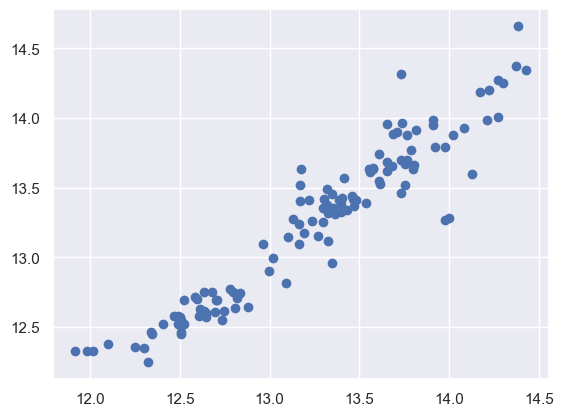

In [157]:
y_hat = reg.predict(x_train)
plt.scatter(y_train, y_hat)

Text(0.5, 1.0, 'Residuals PDF')

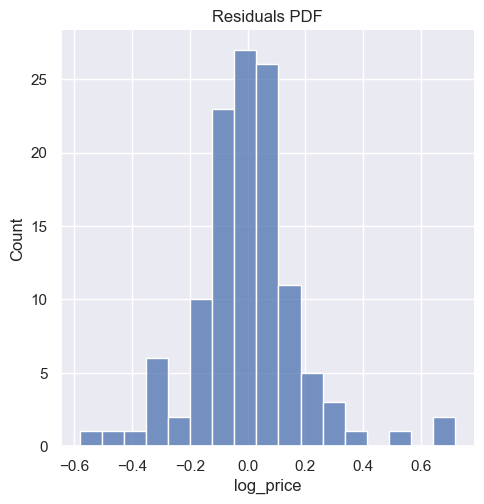

In [158]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF")

In [159]:
reg.score(x_train, y_train)

0.9039806336301394

In [160]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [161]:
adj_r2(x_train, y_train)

0.897060318936816

In [215]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = (np.exp(reg.coef_ / scaler.scale_) - 1) * 100

In [216]:
from sklearn.feature_selection import f_regression
f_stat, p_values = f_regression(x_train, y_train)

In [218]:
reg_summary['f_stat'] = f_stat.round(3)
reg_summary['p_value'] = p_values.round(3)
reg_summary

,Features,Weights,f_stat,p_value
0,beds,6.534223,259.296,0.000
1,baths,1.869747,98.179,0.000
2,sqft,0.029756,309.662,0.000
3,yr_built,0.500459,11.778,0.001
4,cooling_yn_Yes,5.467140,14.621,0.000
5,style_Single Family Residential,59.250153,231.709,0.000
6,county_Multnomah County,-7.625259,18.539,0.000
7,has_hoa_Yes,-13.661459,17.321,0.000


In [166]:
y_hat_test = reg.predict(x_test)

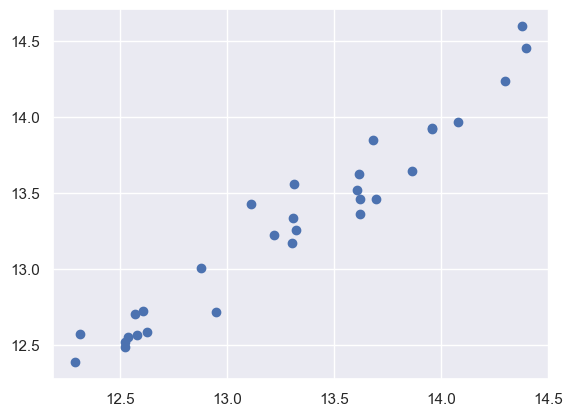

In [167]:
plt.scatter(y_test, y_hat_test)

In [168]:
df_pf = pd.DataFrame(y_hat_test, columns=['log_predictions'])
df_pf['predictions'] = np.exp(y_hat_test)

In [169]:
y_test = y_test.reset_index(drop=True)
df_pf['log_target'] = y_test
df_pf['target'] = np.exp(y_test)
df_pf

,log_predictions,predictions,log_target,target
0,13.929030,1.120214e+06,13.955273,1150000.0
1,14.236534,1.523520e+06,14.299479,1622500.0
2,13.457096,6.987836e+05,13.693343,885000.0
3,12.715637,3.329133e+05,12.948010,420000.0
4,12.700164,3.278016e+05,12.568978,287500.0
5,13.621671,8.237902e+05,13.617060,820000.0
6,14.597490,2.185794e+06,14.375126,1750000.0
7,13.455120,6.974039e+05,13.623017,824900.0
8,12.572167,2.884183e+05,12.313226,222621.0
9,13.166935,5.227899e+05,13.304683,599999.0


In [175]:
df_pf['residual'] = df_pf['target'] - df_pf['predictions']
df_pf['Difference%'] = df_pf['residual']/df_pf['target']*100
df_pf

,log_predictions,predictions,log_target,target,residual,Difference%,SE_residuals
0,13.929030,1.120214e+06,13.955273,1150000.0,29786.240035,2.590108,147506.028885
1,14.236534,1.523520e+06,14.299479,1622500.0,98980.413465,6.100488,147506.028885
2,13.457096,6.987836e+05,13.693343,885000.0,186216.412658,21.041403,147506.028885
3,12.715637,3.329133e+05,12.948010,420000.0,87086.685824,20.734925,147506.028885
4,12.700164,3.278016e+05,12.568978,287500.0,-40301.627556,-14.017957,147506.028885
5,13.621671,8.237902e+05,13.617060,820000.0,-3790.189629,-0.462218,147506.028885
6,14.597490,2.185794e+06,14.375126,1750000.0,-435794.022928,-24.902516,147506.028885
7,13.455120,6.974039e+05,13.623017,824900.0,127496.052895,15.455940,147506.028885
8,12.572167,2.884183e+05,12.313226,222621.0,-65797.271520,-29.555734,147506.028885
9,13.166935,5.227899e+05,13.304683,599999.0,77209.121765,12.868208,147506.028885


In [195]:
import scipy.stats as stats
SE_residual = np.sqrt(np.sum(df_pf['residual']**2) / (len(y_test) - x_test.shape[1]))
margin_error = SE_residual*stats.t.ppf(.90, len(x_test) - 1)
df_pf['lower_bound'] = df_pf['predictions'] - margin_error
df_pf['upper_bound'] = df_pf['predictions'] + margin_error
df_pf

,log_predictions,predictions,log_target,target,residual,Difference%,SE_residuals,lower_bound,upper_bound
0,13.929030,1.120214e+06,13.955273,1150000.0,29786.240035,2.590108,147506.028885,9.267694e+05,1.313658e+06
1,14.236534,1.523520e+06,14.299479,1622500.0,98980.413465,6.100488,147506.028885,1.330075e+06,1.716964e+06
2,13.457096,6.987836e+05,13.693343,885000.0,186216.412658,21.041403,147506.028885,5.053392e+05,8.922280e+05
3,12.715637,3.329133e+05,12.948010,420000.0,87086.685824,20.734925,147506.028885,1.394689e+05,5.263577e+05
4,12.700164,3.278016e+05,12.568978,287500.0,-40301.627556,-14.017957,147506.028885,1.343573e+05,5.212460e+05
5,13.621671,8.237902e+05,13.617060,820000.0,-3790.189629,-0.462218,147506.028885,6.303458e+05,1.017235e+06
6,14.597490,2.185794e+06,14.375126,1750000.0,-435794.022928,-24.902516,147506.028885,1.992350e+06,2.379238e+06
7,13.455120,6.974039e+05,13.623017,824900.0,127496.052895,15.455940,147506.028885,5.039596e+05,8.908483e+05
8,12.572167,2.884183e+05,12.313226,222621.0,-65797.271520,-29.555734,147506.028885,9.497390e+04,4.818626e+05
9,13.166935,5.227899e+05,13.304683,599999.0,77209.121765,12.868208,147506.028885,3.293455e+05,7.162342e+05


In [225]:
d = {'beds': [3], 'baths': [2.5], 'sqft': [1800], 'yr_built': [1999], 'cooling_yn_Yes': [1], 'style_Single Family Residential': [1], 'county_Multnomah County': [0], 'has_hoa_Yes': [1]}
ka_home = pd.DataFrame(data=d)
ka_home_scaled = scaler.transform(ka_home)
ka_hat = reg.predict(ka_home_scaled)
# ka_home = reg.predict([scaler.transform([3, 2.5, 2100, 1999, 1, 0, 0, 1])])
# ka_home[0].round()

In [226]:
np.exp(ka_hat)

array([727272.24448642])

In [198]:
np.exp(ka_hat) - margin_error

array([263241.0604274])

In [199]:
np.exp(ka_hat) + margin_error

array([650129.79934759])